In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
data = pd.read_csv("merged_data.csv")
# Any results you write to the current directory are saved as output.
data.head(10)
np.random.seed(seed=42)

In [7]:
(data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)

36                 99.995925
61                 99.323553
4                  98.182559
58                 96.083945
59                 96.083945
60                 96.083945
57                 95.599022
8                  84.971475
5                  20.105949
17                  4.400978
10                  4.400978
7                   3.916055
2                   3.916055
45                  3.916055
44                  2.766911
56                  0.994295
20                  0.000000
21                  0.000000
3                   0.000000
33                  0.000000
Cost unit           0.000000
48                  0.000000
43                  0.000000
46                  0.000000
47                  0.000000
Cost                0.000000
49                  0.000000
50                  0.000000
Cost m2             0.000000
Cost m2 unit        0.000000
CadastralNumber     0.000000
dtype: float64

In [8]:
for feature in ["20", "21", "48", "49"]:
    print(f"Unique values of {feature}")
    print(data[feature].unique())
    print("-----------------------------------")

Unique values of 20
[  0.  81.  95. 189. 107. 146.  21.  61.  17.  46. 139.  92.  84.  38.
 127.  80. 195.  28.  97. 117. 202.  23. 130.  85.]
-----------------------------------
Unique values of 21
[ 0.  11.  32.  14.  13.   9.2  7.  19.   3.5 27.   8.1 12.  22.   4.7
 21.  23.   4.1 20. ]
-----------------------------------
Unique values of 48
[117 118]
-----------------------------------
Unique values of 49
[124 123 122 121]
-----------------------------------


In [9]:
to_drop = ["Cost m2 unit", "Cost unit", "43", "44", "CadastralNumber"]
print("Before -",data.shape)
for column in data.columns:
    if data[column].isnull().sum() > data.shape[0] * 0.4 or len(data[column].unique()) == 1:
        to_drop.append(column)
data = data.drop(to_drop, axis=1).dropna()
print("After -",data.shape)

Before - (24540, 31)
After - (19594, 15)


In [10]:
print("20", data["20"].unique())
print("21", data["21"].unique())
print("48", data["48"].unique())
print("49", data["49"].unique())

20 [0.]
21 [0.]
48 [117]
49 [124]


In [11]:
data = data.drop(["20", "21", "48", "49"], axis=1)

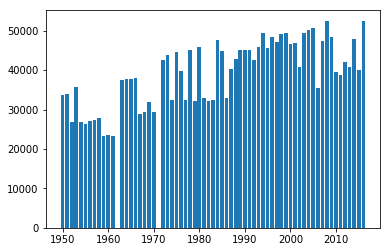

In [12]:
plt.bar(data["33"], data["Cost m2"])
plt.show()

In [13]:
data.head(4)

,10,17,2,3,33,45,5,56,7,Cost m2,Cost
0,3137.450,57.331,1.0,3,1982,102.0,30.0,11160.0,38.0,32280.39,1068480.91
1,1277.343,102.840,2.0,5,1973,104.0,31.0,14624.0,38.0,42853.69,1277039.96
2,1315.543,120.413,2.0,5,2005,102.0,31.0,11155.0,41.0,43745.45,5179461.28
3,3054.712,108.931,2.0,5,1998,102.0,33.0,10933.0,41.0,30787.71,3294284.97


In [17]:
import math
def transformation(value, transform='square'): 
    if transform == 'log':
        return 0 if math.log1p(value) == None else max(0, min(10 ** 3, math.log1p(value))) 
    elif transform == 'sqrt':
        return math.sqrt(value + 3.0 / 8) 
    elif transform == 'square':
        return value ** 2 
    elif transform == 'sin':
        return math.sin(value)
    elif transform == 'cos': 
        return math.cos(value)
data["sum1"] = data["17"] + data["7"]
data["mul1"] = data["3"] * data["2"]
data["mul2"] = data["7"] * data["5"]
columns = data.drop(["Cost m2", "Cost"], axis=1).columns
possible_transformations = ["log", "sqrt", "square", "sin", "cos"]
for column in columns:
    for transform in possible_transformations:
        data[f"{column}_{transform}"] = data[column].apply(transformation,  args=(transform,))
print(data.columns)

Index(['10', '17', '2', '3', '33', '45', '5', '56', '7', 'Cost m2', 'Cost',
       'sum1', 'mul1', 'mul2', '10_log', '10_sqrt', '10_square', '10_sin',
       '10_cos', '17_log', '17_sqrt', '17_square', '17_sin', '17_cos', '2_log',
       '2_sqrt', '2_square', '2_sin', '2_cos', '3_log', '3_sqrt', '3_square',
       '3_sin', '3_cos', '33_log', '33_sqrt', '33_square', '33_sin', '33_cos',
       '45_log', '45_sqrt', '45_square', '45_sin', '45_cos', '5_log', '5_sqrt',
       '5_square', '5_sin', '5_cos', '56_log', '56_sqrt', '56_square',
       '56_sin', '56_cos', '7_log', '7_sqrt', '7_square', '7_sin', '7_cos',
       'sum1_log', 'sum1_sqrt', 'sum1_square', 'sum1_sin', 'sum1_cos',
       'mul1_log', 'mul1_sqrt', 'mul1_square', 'mul1_sin', 'mul1_cos',
       'mul2_log', 'mul2_sqrt', 'mul2_square', 'mul2_sin', 'mul2_cos'],
      dtype='object')


You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


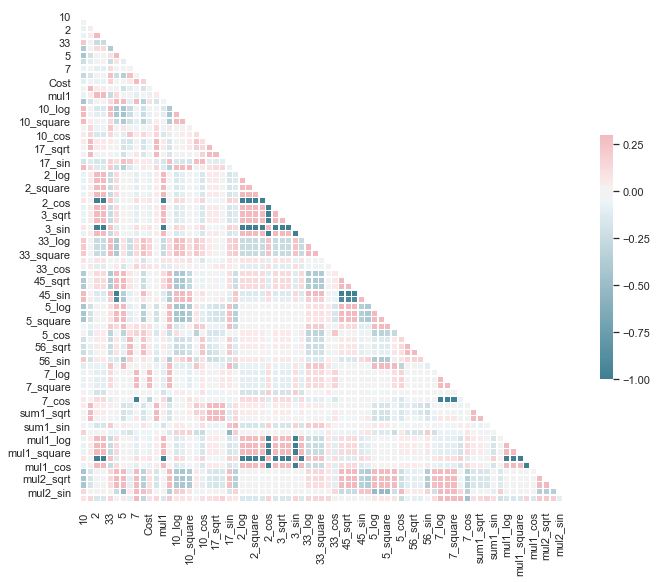

In [18]:
!pip3 install seaborn
import seaborn as sns
from string import ascii_letters
sns.set(style="white")

corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [19]:
def remove_collinear_features(x, threshold):
    y = x['Cost m2']
    x = x.drop(['Cost m2'], axis=1)
    # Считаем матрицу кореляций
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Сравниваем фичу каждую с каждой
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # Если кореляция больше, чем трешхолд
            if val >= threshold:
                drop_cols.append(col.values[0])

    # Удаляем по одному из каждой пары корелируемых
    drops = set(drop_cols)
    x = x.drop(drops, axis=1)
    
    # Возвращаем таргет в таблицу
    x['Cost m2'] = y
    return x

data = remove_collinear_features(data, 0.55)

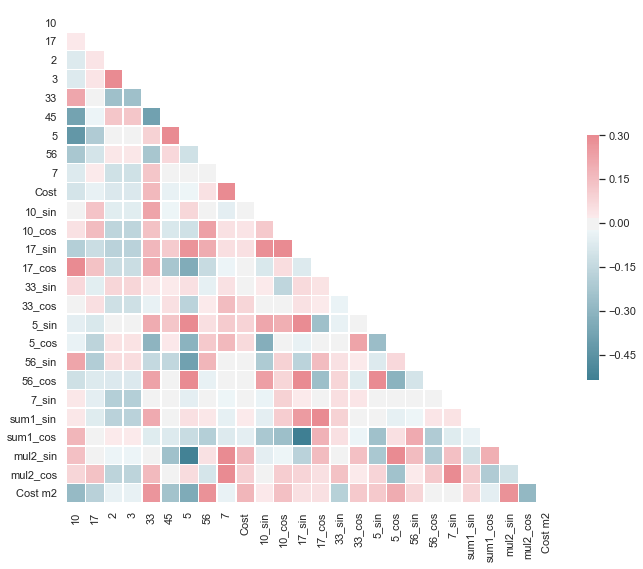

In [20]:
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Y = data["Cost m2"]
X = data.drop(["Cost m2", "Cost"], axis=1)

# Вычислим среднее и стандартное отклонение данных обучения и применим это же преобразование 
# к тестовым и валидационным данным используя класс sklearn.preprocessing.StandardScaler.

scalerX = StandardScaler().fit(X)
scalery = StandardScaler().fit(Y.reshape(-1, 1))

X_train, X_test_val, Y_train, Y_test_val = train_test_split(X, Y, test_size=0.1, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_test_val, Y_test_val, test_size=0.5, random_state=42)

X_train, Y_train = scalerX.transform(X_train), scalery.transform(Y_train.reshape(-1, 1))
X_test, Y_test = scalerX.transform(X_test), scalery.transform(Y_test.reshape(-1, 1))
X_val, Y_val =  scalerX.transform(X_val), scalery.transform(Y_val.reshape(-1, 1))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [22]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras import backend
from keras import callbacks
from keras.callbacks import ModelCheckpoint
from keras import optimizers


In [23]:
# Функция потерь (RMSE)
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

def keras_model(weights=None):
    # Создаем модель
    model = Sequential()
    # Добавляем полносвязные слои, в качестве функции активации - relu 
    model.add(Dense(48, input_dim=24, kernel_initializer='normal', activation='relu'))
    model.add(Dense(12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    # Если в модель передавались веса - подгружаем
    if weights != None:
        model.load_weights(weights)
    # Собираем нашу модель, в качестве оптимизации - Adam
    model.compile(loss=rmse, optimizer='adam', metrics=[rmse])
    # Топология: 24 inputs -> [48 -> 24] -> [24 -> 12] -> [12 -> 6] -> 1 output
    return model

In [42]:
# Повесим 2 callback на наш процесс обучения (раннюю остановку обучения и сохранение модели)
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
checkpoint = ModelCheckpoint('model.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')  

# Не знаю, почему тут pipeline - раньше я применял нормировку здесь. 
# Но, как говорится, работает - не трогай:)
pipe = Pipeline([
    ('nn', KerasRegressor(build_fn=keras_model, epochs=10000, batch_size=64,
                           validation_split=0.1, callbacks=[early_stopping, checkpoint]))
])

# Обучим нашу "недотрубу"
pipe.fit(X_train, Y_train)

Train on 15870 samples, validate on 1764 samples
Epoch 1/10000
15870/15870 [==============================] - 1s 76us/step - loss: 0.4211 - rmse: 0.4211 - val_loss: 0.1464 - val_rmse: 0.1464

Epoch 00001: val_loss improved from inf to 0.14640, saving model to model.h5
Epoch 2/10000
15870/15870 [==============================] - 0s 20us/step - loss: 0.1080 - rmse: 0.1080 - val_loss: 0.0811 - val_rmse: 0.0811

Epoch 00002: val_loss improved from 0.14640 to 0.08109, saving model to model.h5
Epoch 3/10000
15870/15870 [==============================] - 0s 20us/step - loss: 0.0654 - rmse: 0.0654 - val_loss: 0.0536 - val_rmse: 0.0536

Epoch 00003: val_loss improved from 0.08109 to 0.05365, saving model to model.h5
Epoch 4/10000
15870/15870 [==============================] - 0s 20us/step - loss: 0.0476 - rmse: 0.0476 - val_loss: 0.0415 - val_rmse: 0.0415

Epoch 00004: val_loss improved from 0.05365 to 0.04152, saving model to model.h5
Epoch 5/10000
15870/15870 [==============================] 

15870/15870 [==============================] - 0s 21us/step - loss: 0.0122 - rmse: 0.0122 - val_loss: 0.0118 - val_rmse: 0.0118

Epoch 00040: val_loss did not improve from 0.01032
Epoch 41/10000
15870/15870 [==============================] - 0s 20us/step - loss: 0.0119 - rmse: 0.0119 - val_loss: 0.0181 - val_rmse: 0.0181

Epoch 00041: val_loss did not improve from 0.01032
Epoch 42/10000
15870/15870 [==============================] - 0s 20us/step - loss: 0.0120 - rmse: 0.0120 - val_loss: 0.0120 - val_rmse: 0.0120

Epoch 00042: val_loss did not improve from 0.01032
Epoch 43/10000
15870/15870 [==============================] - 0s 20us/step - loss: 0.0110 - rmse: 0.0110 - val_loss: 0.0114 - val_rmse: 0.0114

Epoch 00043: val_loss did not improve from 0.01032
Epoch 44/10000
15870/15870 [==============================] - 0s 20us/step - loss: 0.0114 - rmse: 0.0114 - val_loss: 0.0112 - val_rmse: 0.0112

Epoch 00044: val_loss did not improve from 0.01032
Epoch 45/10000
15870/15870 [============

Pipeline(memory=None,
     steps=[('nn', <keras.wrappers.scikit_learn.KerasRegressor object at 0x124120e80>)])

In [47]:
from keras.models import load_model
model = load_model('../Desktop/model.h5', custom_objects={'rmse':rmse})

In [50]:
# Посчитаем RMSE на тестовых данных
model.evaluate(X_test, Y_test)

980/980 [==============================] - 0s 23us/step


[0.007472471618188583, 0.007472471618188583]

In [51]:
# Используем inverse_transform для возвращения от нормированных данных к настоящим
real_value_predict = scalery.inverse_transform(model.predict(X_test)).ravel()
real_value_target = scalery.inverse_transform(Y_test).ravel()
# Посмотрим на часть предсказаний в сравнении с реальными ответами
pd.DataFrame({"prediction": np.round(real_value_predict, 2), "test": real_value_target}).head(1000)

,prediction,test
0,34494.000000,34560.61
1,32822.230469,32764.26
2,38881.339844,38752.47
3,29624.689453,29633.46
4,42555.519531,42500.80
5,38649.578125,38654.76
6,31233.960938,31180.24
7,32395.050781,32435.72
8,41176.621094,41182.75
9,42484.441406,42594.44
